# Assignment 1 (4 scores)

- Use Numpy only to construct the Logistic Regression model.
- Train that Logistic Regression model dataset using the Gradient Descend approach on the [Predict students’ dropout and academic success](https://archive.ics.uci.edu/dataset/697/predict+students+dropout+and+academic+success) dataset. *Note that three class in this dataset must be merge into two class as: graduate and non-graduate (dropout or enroll)*.
- Evaluate that Logistic Regression model on the [Predict students’ dropout and academic success](https://archive.ics.uci.edu/dataset/697/predict+students+dropout+and+academic+success) dataset.
- Visualize the loss function of the training process.

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')

In [2]:
df1 = pd.read_csv ("data/Predict_Students.csv", delimiter=";") 

# Tạo 1 DataFrame để lưu thông tin gốc
students = pd.read_csv ("data/Predict_Students.csv", delimiter=";")

df1.head (10)

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate
5,2,39,1,9991,0,19,133.1,1,37,37,...,0,5,17,5,11.500000,5,16.2,0.3,-0.92,Graduate
6,1,1,1,9500,1,1,142.0,1,19,38,...,0,8,8,8,14.345000,0,15.5,2.8,-4.06,Graduate
7,1,18,4,9254,1,1,119.0,1,37,37,...,0,5,5,0,0.000000,0,15.5,2.8,-4.06,Dropout
8,1,1,3,9238,1,1,137.0,62,1,1,...,0,6,7,6,14.142857,0,16.2,0.3,-0.92,Graduate
9,1,1,1,9238,1,1,138.0,1,1,19,...,0,6,14,2,13.500000,0,8.9,1.4,3.51,Dropout


In [3]:
df1.shape

(4424, 37)

In [4]:
df1.info ()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance	                     4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Previous qualification (grade)                  4424 non-null   float64
 7   Nacionality                                     4424 non-null   int64  
 8   Mother's qualification                          4424 non-null   int64  
 9   Father's qualification                   

In [5]:
df1.describe ()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,...,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,1.178571,18.669078,1.727848,8856.642631,0.890823,4.577758,132.613314,1.873192,19.561935,22.275316,...,0.137658,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969
std,0.605747,17.484682,1.313793,2063.566416,0.311897,10.216592,13.188332,6.914514,15.603186,15.343108,...,0.690880,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935
min,1.000000,1.000000,0.000000,33.000000,0.000000,1.000000,95.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,1.000000,1.000000,1.000000,9085.000000,1.000000,1.000000,125.000000,1.000000,2.000000,3.000000,...,0.000000,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000
50%,1.000000,17.000000,1.000000,9238.000000,1.000000,1.000000,133.100000,1.000000,19.000000,19.000000,...,0.000000,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000
75%,1.000000,39.000000,2.000000,9556.000000,1.000000,1.000000,140.000000,1.000000,37.000000,37.000000,...,0.000000,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000
max,6.000000,57.000000,9.000000,9991.000000,1.000000,43.000000,190.000000,109.000000,44.000000,44.000000,...,12.000000,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000


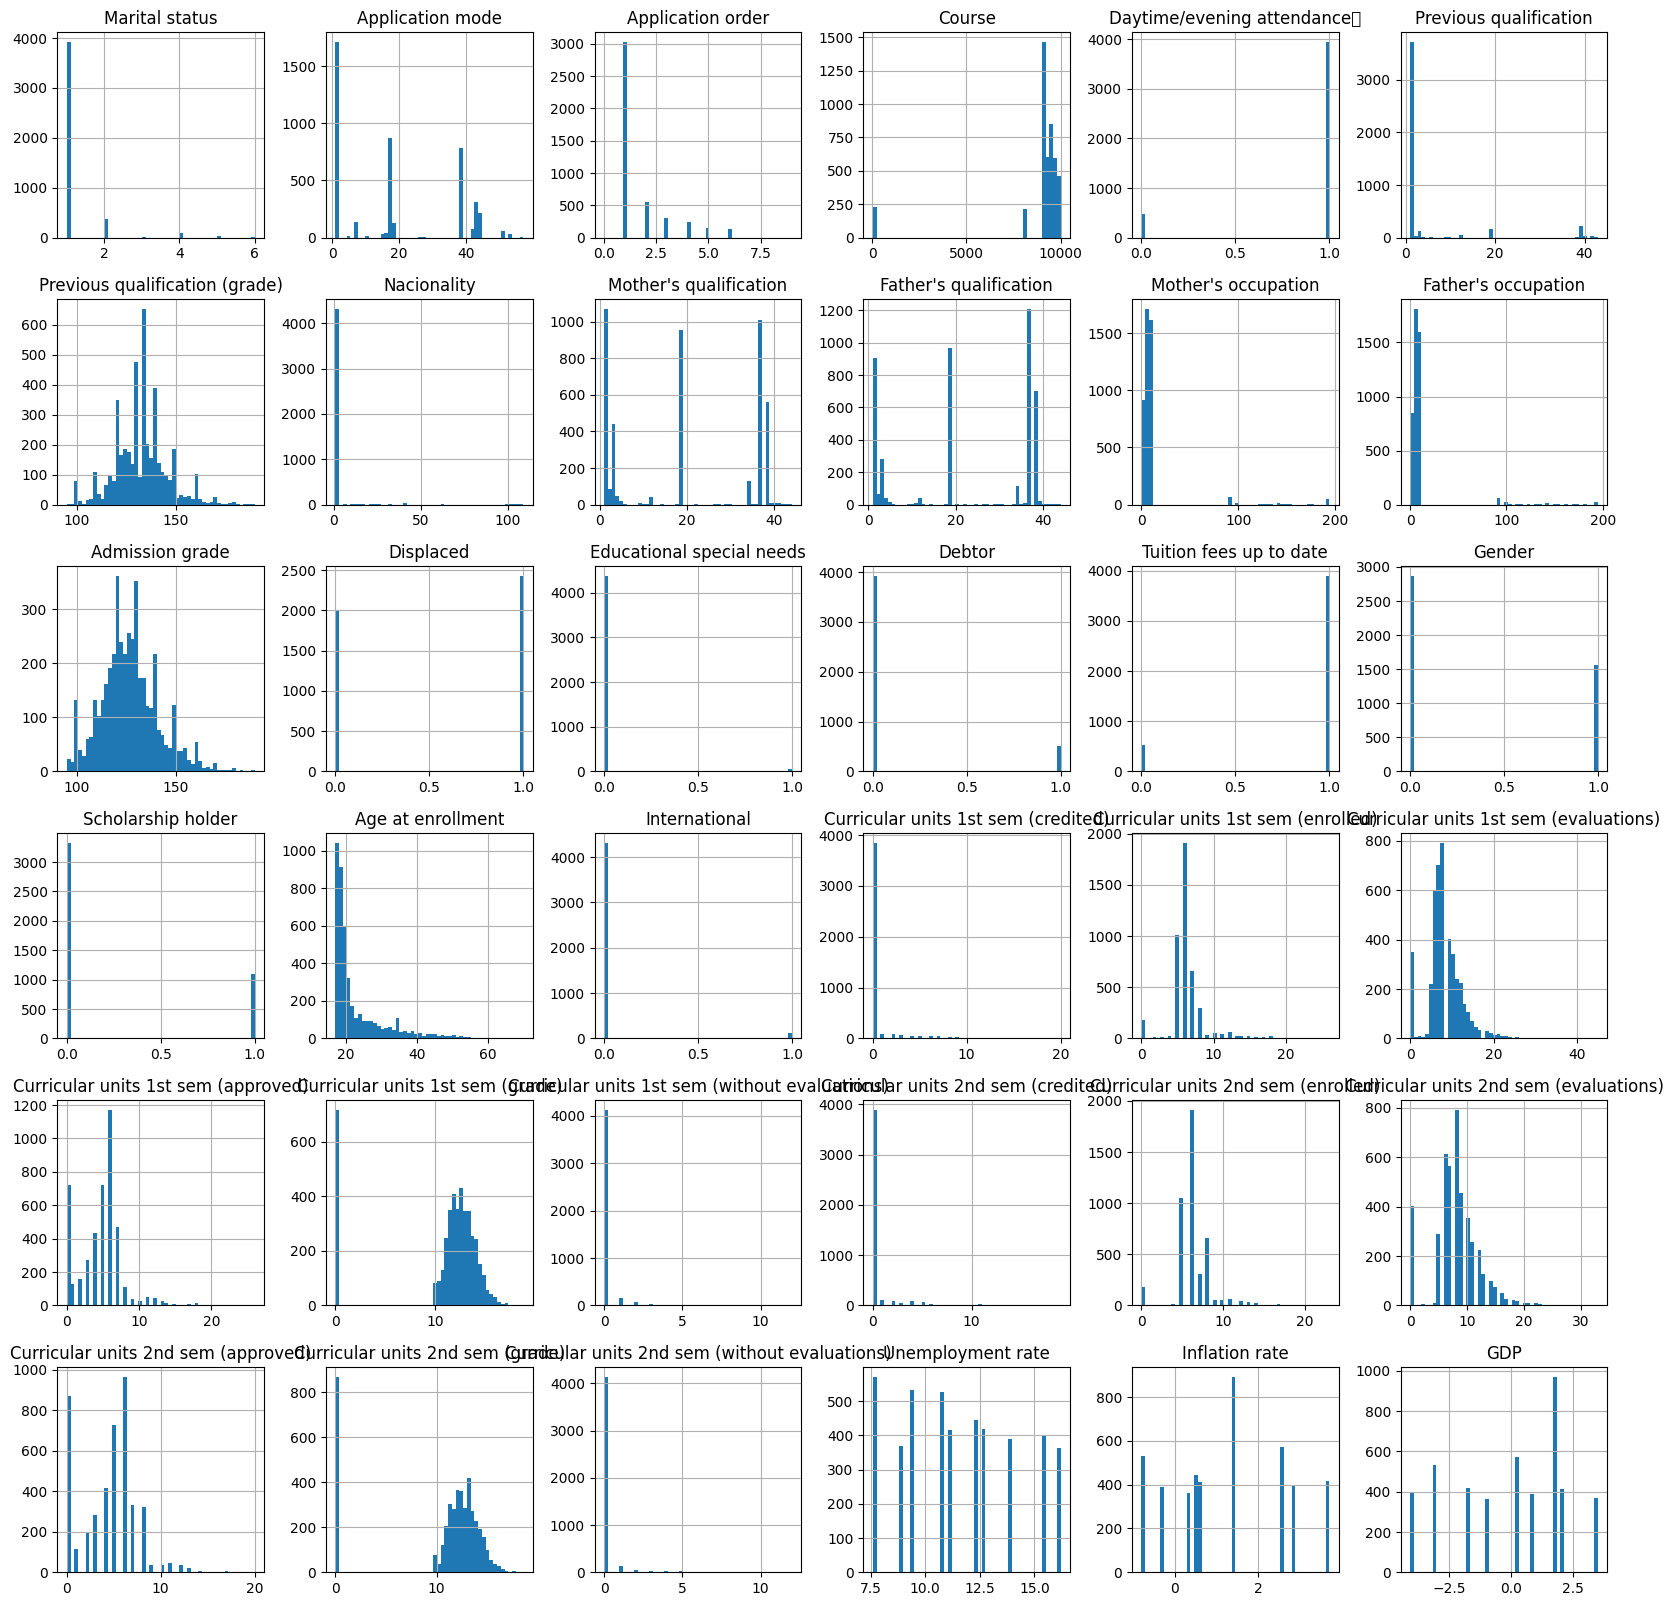

In [8]:
students.hist (bins=50, figsize=(20,20))
plt.show ()

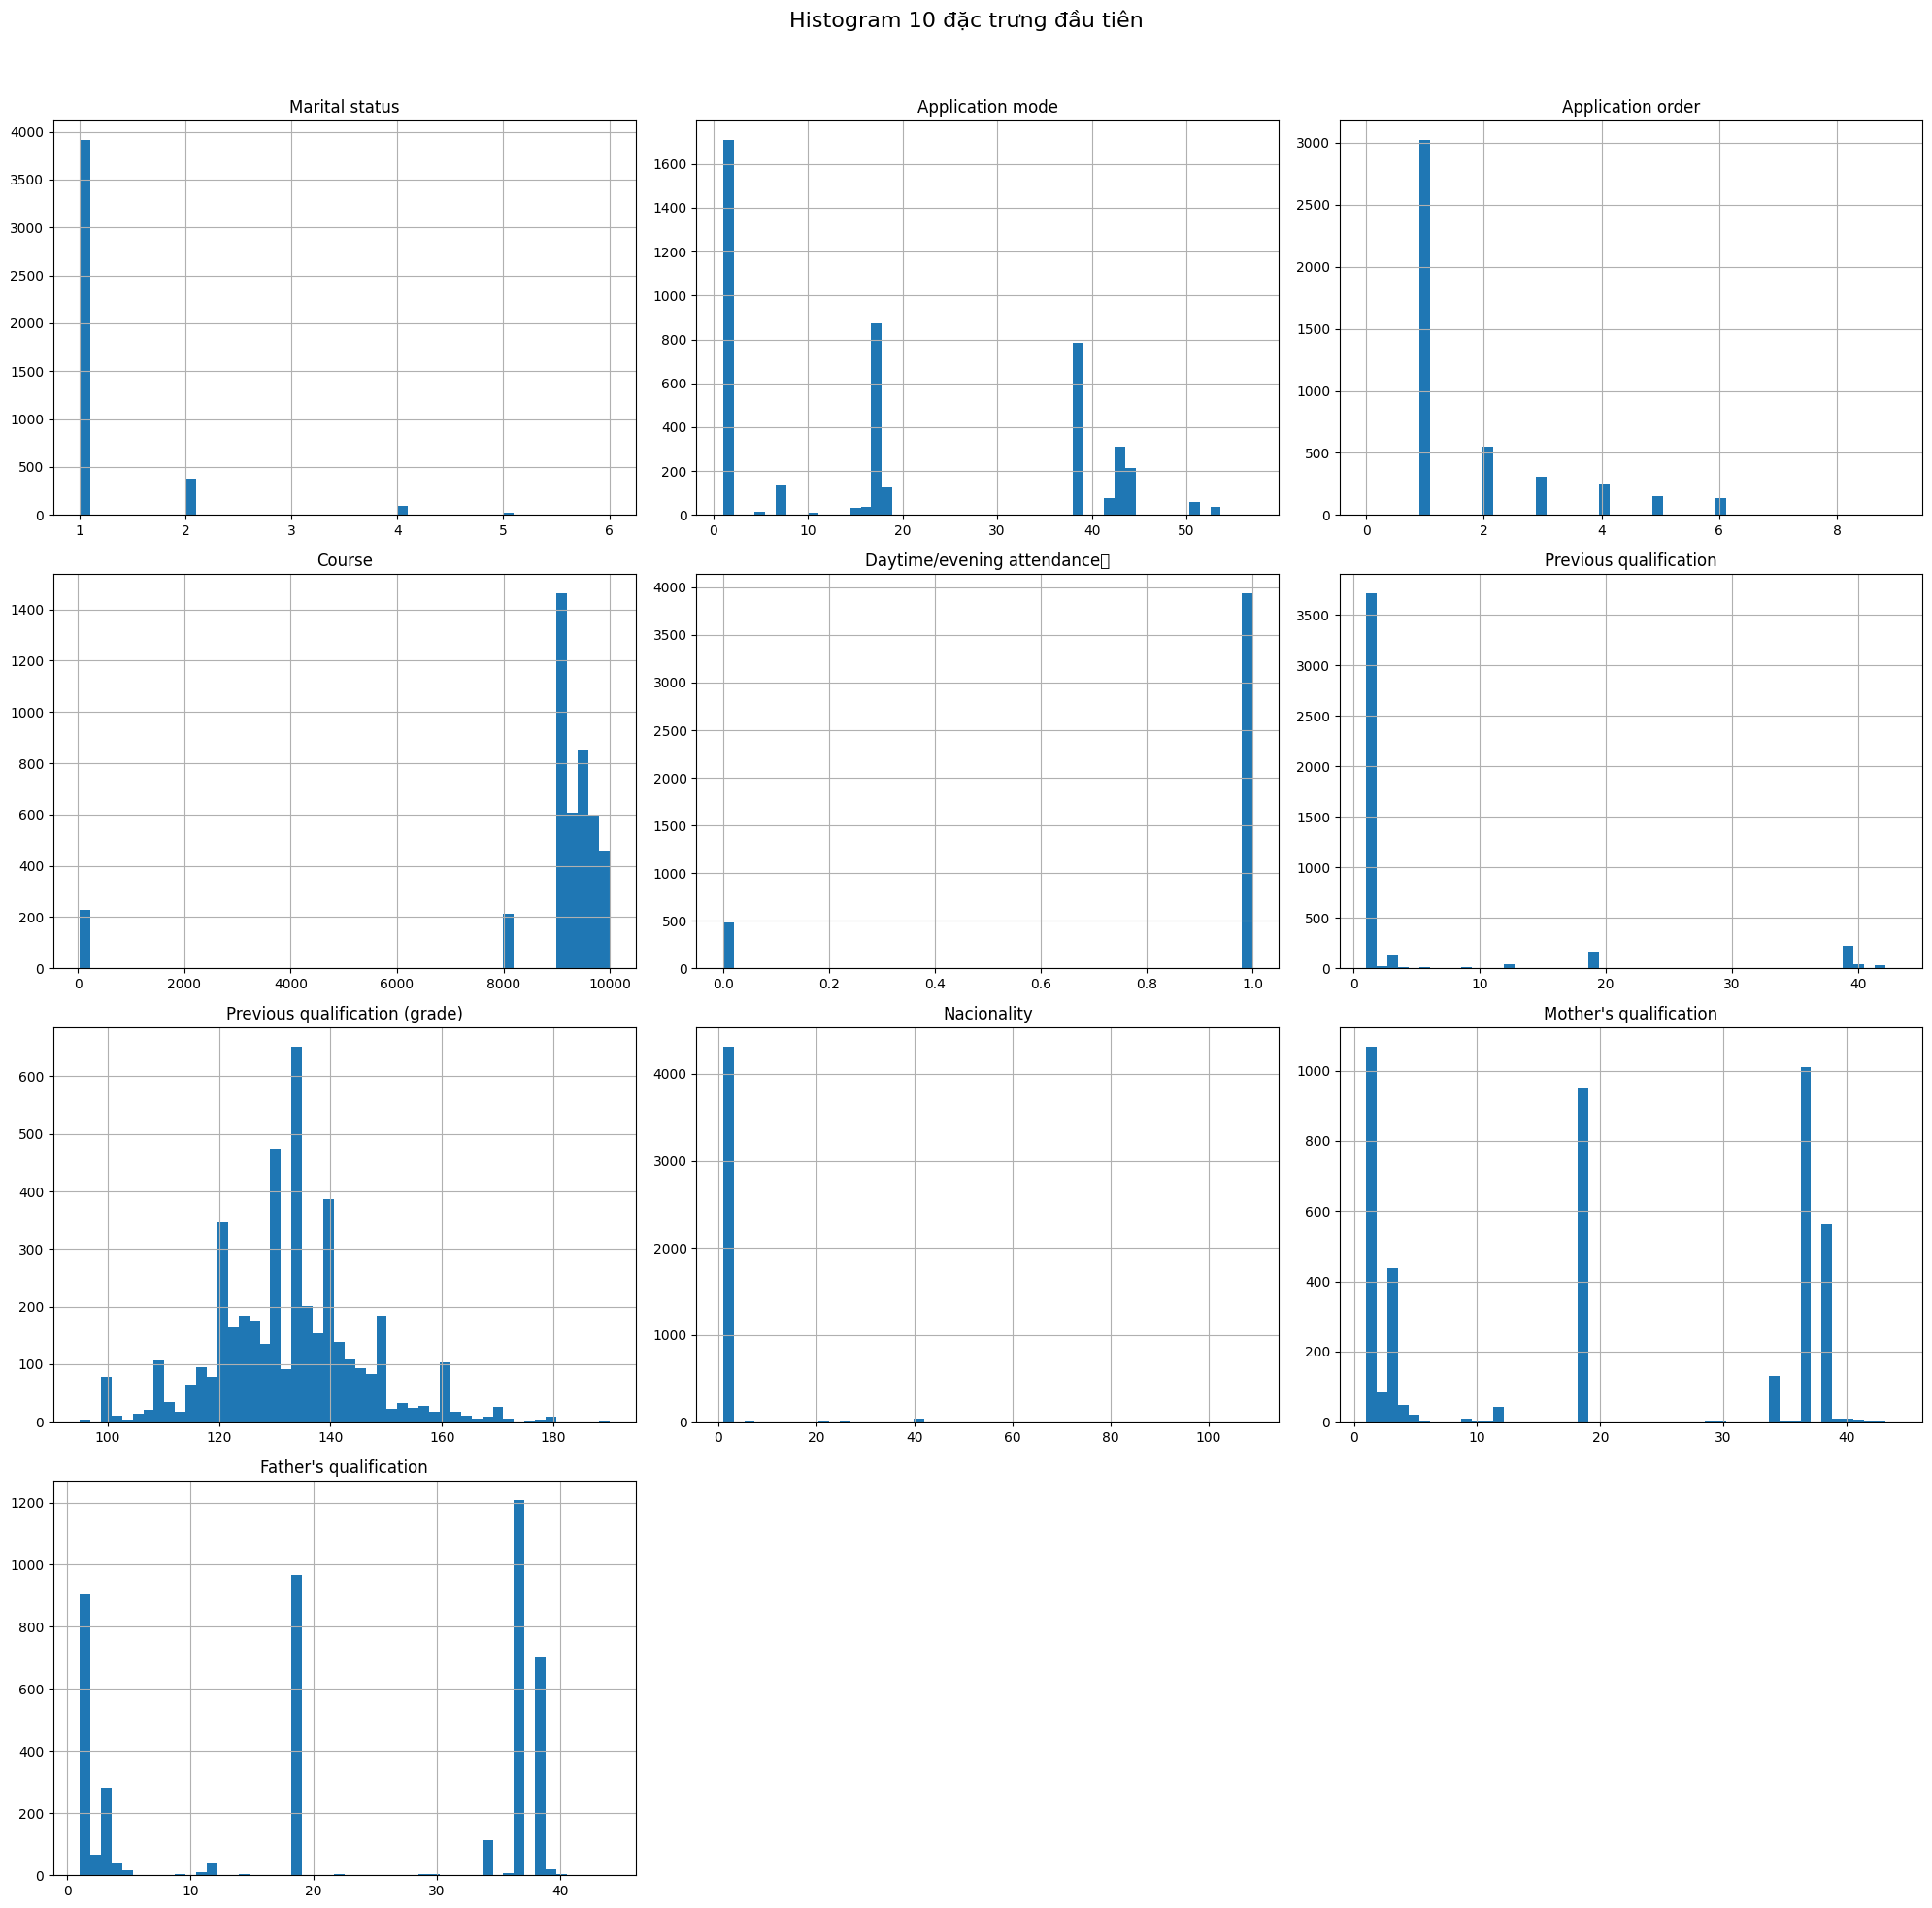

In [9]:
# small_table = students.iloc[:,:10]
# small_table.head ()
students.iloc[:,:10].hist (bins=50, figsize=(20,20))

# Thêm tiêu đề cho toàn bộ figure
plt.suptitle("Histogram 10 đặc trưng đầu tiên", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.legend ()
plt.show ()

array([[<Axes: title={'center': "Mother's occupation"}>,
        <Axes: title={'center': "Father's occupation"}>,
        <Axes: title={'center': 'Admission grade'}>],
       [<Axes: title={'center': 'Displaced'}>,
        <Axes: title={'center': 'Educational special needs'}>,
        <Axes: title={'center': 'Debtor'}>],
       [<Axes: title={'center': 'Tuition fees up to date'}>,
        <Axes: title={'center': 'Gender'}>,
        <Axes: title={'center': 'Scholarship holder'}>],
       [<Axes: title={'center': 'Age at enrollment'}>, <Axes: >,
        <Axes: >]], dtype=object)

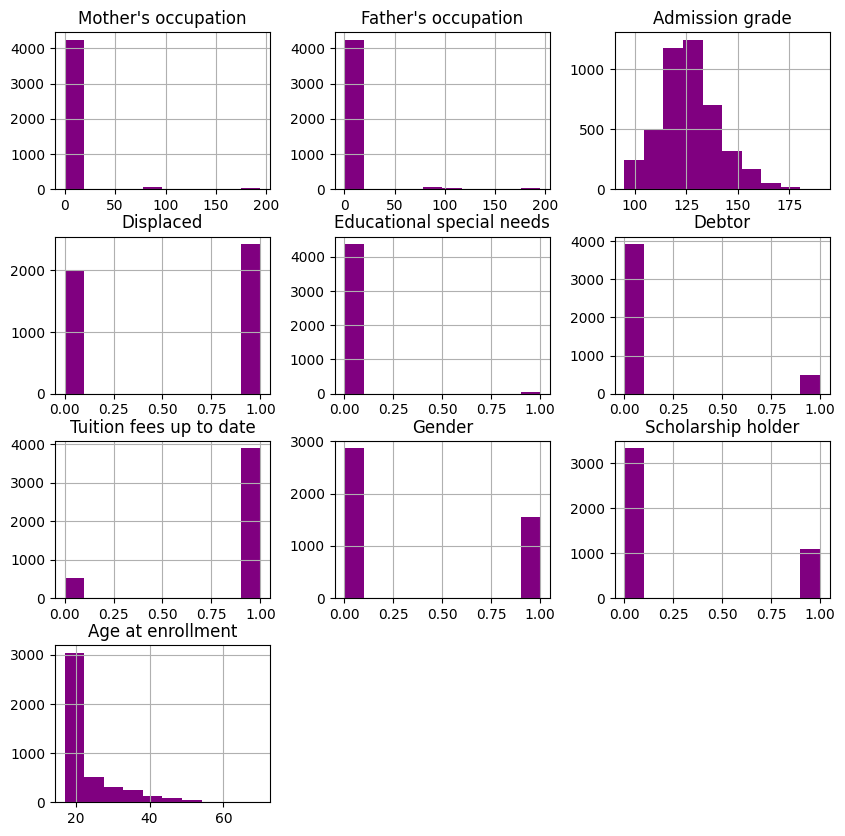

In [10]:
import matplotlib.cm as cm  # Import colormap
colors = ['red', 'blue', 'green', 'orange', 'purple', 'yellow', 'black', 'grey', 'pink']  # 9 màu cho 9 cột
df1.iloc[:, 10:20].hist(figsize=(10,10), color='purple')

In [11]:
corr_matrix = np.zeros((len(df1.columns[:-1]),len(df1.columns[:-1])))

In [12]:
cov = np.zeros((len(df1.columns[:-1]),len(df1.columns[:-1])))
for i, col_name_i in enumerate(df1.columns[:-1]):
    for j, col_name_j in enumerate(df1.columns[:-1]):
        cov[i, j] = np.corrcoef(df1[col_name_i].to_numpy(), df1[col_name_j].to_numpy())[0,1]
cov

array([[ 1.        ,  0.26400582, -0.12585445, ..., -0.02033757,
         0.00876135, -0.02700341],
       [ 0.26400582,  1.        , -0.28635726, ...,  0.08908008,
        -0.01637463, -0.02274272],
       [-0.12585445, -0.28635726,  1.        , ..., -0.09841917,
        -0.01113321,  0.03020082],
       ...,
       [-0.02033757,  0.08908008, -0.09841917, ...,  1.        ,
        -0.02888466, -0.33517812],
       [ 0.00876135, -0.01637463, -0.01113321, ..., -0.02888466,
         1.        , -0.11229464],
       [-0.02700341, -0.02274272,  0.03020082, ..., -0.33517812,
        -0.11229464,  1.        ]], shape=(36, 36))

In [11]:
plt.figure(figsize=(100,100))
sns.heatmap(cov, xticklabels=df1.columns[:-1], yticklabels=df1.columns[:-1], annot=cov)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/seaborn/utils.py:61: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  fig.canvas.draw()


<Axes: >

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/IPython/core/events.py:82: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


In [12]:
# fig = plt.figure (figsize=(15,15))
# fig.set_figwidth (100)
# fig.set_figheight (100)
# plt.tick_params (labelrotation=45, labelsize=20)
# sns.pairplot (data=df1)

In [13]:
# sns.pairplot(data=df1, height=5, aspect=1)  # Mỗi biểu đồ cao 5 inch, tỉ lệ 1:1
# plt.show()


Normalizing data

In [13]:
def convert_target (target : str)->int:
    target_dict = {
        'Graduate' : 0,
        'Dropout' : 1,
        'Enrolled' : 1
    }
    return target_dict [target]

In [14]:
df1["Target"] = df1["Target"].apply (convert_target)
df1.head ()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,1
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,0
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,1
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,0
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,0


In [15]:
def normalize_data (df):
    continuous_columns = [
        "Previous qualification (grade)",
        "Admission grade",
        "Unemployment rate",
        "Inflation rate",
        "GDP"
    ]
    for col in continuous_columns:
        df [col] = (df[col] - df[col].mean ()) / df[col].std ()

In [16]:
normalize_data (df1)

In [17]:
df1.head ()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,-0.804750,1,19,12,...,0,0,0,0,0.000000,0,-0.287606,0.124372,0.765674,1
1,1,15,1,9254,1,1,2.076585,1,1,3,...,0,6,6,6,13.666667,0,0.876123,-1.105097,0.347160,0
2,1,1,5,9070,1,1,-0.804750,1,37,37,...,0,6,0,0,0.000000,0,-0.287606,0.124372,0.765674,1
3,1,17,2,9773,1,1,-0.804750,1,38,37,...,0,6,10,5,12.400000,0,-0.813161,-1.466705,-1.375356,0
4,2,39,1,8014,0,1,-2.472892,1,37,38,...,0,6,6,6,13.000000,0,0.876123,-1.105097,0.347160,0


In [18]:
X_y_1 = df1.to_numpy ()
X_y_1

array([[ 1.        , 17.        ,  5.        , ...,  0.12437241,
         0.76567428,  1.        ],
       [ 1.        , 15.        ,  1.        , ..., -1.10509664,
         0.34716018,  0.        ],
       [ 1.        ,  1.        ,  5.        , ...,  0.12437241,
         0.76567428,  1.        ],
       ...,
       [ 1.        ,  1.        ,  1.        , ..., -1.10509664,
         0.34716018,  1.        ],
       [ 1.        ,  1.        ,  1.        , ..., -1.46670518,
        -1.37535577,  0.        ],
       [ 1.        , 10.        ,  1.        , ...,  1.78777172,
        -0.74978732,  0.        ]], shape=(4424, 37))

In [19]:
X_y_1.shape

(4424, 37)

In [20]:
N = X_y_1.shape [0]
# Tách tập train và 2 tập dev test
X_y_train, X_y_devtest = np.split (X_y_1, indices_or_sections=[int (N * 0.8)])

# Tách tập dev và test
X_y_dev, X_y_test = np.split (X_y_devtest, indices_or_sections=[int (N*0.1)])

# Tách tập X và y của train, dev, test
X_train, X_dev, X_test = X_y_train [:, :-1], X_y_dev[:,:-1], X_y_test[:,:-1]
y_train, y_dev, y_test = X_y_train [:, -1], X_y_dev[:,-1], X_y_test[:,-1]

In [21]:
print ("Tập X_train: ",X_train.shape,"Tập y_train: ", y_train.shape)
print ("Tập X_dev: ",X_dev.shape,"Tập y_dev: ", y_dev.shape)
print ("Tập X_test: ",X_test.shape,"Tập y_test: ", y_test.shape)


Tập X_train:  (3539, 36) Tập y_train:  (3539,)
Tập X_dev:  (442, 36) Tập y_dev:  (442,)
Tập X_test:  (443, 36) Tập y_test:  (443,)


In [22]:
y_train.shape

(3539,)

In [23]:
y_train = y_train.reshape (-1,1)
y_train.shape

(3539, 1)

In [24]:
class LogisticRegression2:
    def __init__ (self, epoch : int, lr : float):
        ''''''
        self.epoch = epoch
        self.lr = lr
        self.losses = []
        self.metrics = []
        
    def sigmoid (self, z : np.ndarray) -> np.ndarray:
        ''''''
        z = np.clip(z, -500, 500)
        return 1 / (1 + np.exp (-z))
    
    def BGD (self, X : np.ndarray, y: np.ndarray, n : int) -> np.ndarray:
        ''''''
        y_hat = self.predict (X)
        # y = y.reshape(-1, 1)
        # y_hat = y_hat.reshape(-1, 1)
        diff = y_hat - y
        return 1/n * np.matmul (X.T, diff)
    
    # def accuracy (self, y : np.ndarray, y_hat : np.ndarray) -> float:
    #     ''''''
    #     return (1 - np.abs (y - y_hat)).mean ()
    
    def accuracy(self, y: np.ndarray, y_hat: np.ndarray) -> float:
        ''' Tính accuracy theo cách chuẩn '''
        y_pred = (y_hat >= 0.5).astype(int)  # Chuyển xác suất thành 0 hoặc 1
        return (y == y_pred).mean()  # Tính tỷ lệ dự đoán đúng

    
    def logloss (self, y : np.ndarray, y_hat : np.ndarray) -> float:
        '''
        matmul đối với 2 mảng 1 chiều --> Tích vô hướng, trả về 1 số
        * đối với 2 mảng 1 chiều --> Nhân từng phần tử
        => Phải tính tổng của cả mảng sau khi đã *, rồi chia cho m => mean ()
        '''
        
        # m = len (y)
        # costfunction = np.matmul (y, np.log (y_hat)) + np.matmul (1-y,np.log (1-y_hat))
        # return -1/m * costfunction
    
        costfunction = y * np.log(y_hat+1e-16) + (1 - y) * np.log(1 - y_hat+1e-16)
        return -np.mean(costfunction)

        
    def fit (self, X : np.ndarray, y : np.ndarray):
        ''''''
        # X.shape -> (n,d)
        n = X.shape [0]
        d = X.shape [1]
        self.theta : np.ndarray = np.zeros ((d, 1))
        with tqdm (range (self.epoch)) as pb:
            for e in pb:
                # forward
                pb.set_description (f"Epoch {e+1}")
                #backward
                gradient = self.BGD (X, y, n)
                self.theta = self.theta - self.lr * gradient 
                
                # evaluating
                y_hat = self.predict (X)
                loss = self.logloss (y, y_hat)
                acc = self.accuracy (y, y_hat)
                pb.set_postfix ({
                    "loss" : loss,
                    "acc" : acc
                })
                
                self.losses.append (loss)
                self.metrics.append (acc)
                
        
    def predict (self, X : np.ndarray) -> float:
        ''''''
        z = np.matmul (X, self.theta)
        y_hat = self.sigmoid (z)
        return y_hat

In [25]:
log_reg = LogisticRegression2 (1000, 0.01)
log_reg.fit (X_train, y_train)

Epoch 1000: 100%|██████████| 1000/1000 [00:01<00:00, 896.84it/s, loss=18.3, acc=0.504]


In [26]:
print (log_reg.theta.shape)
np.set_printoptions(threshold=1000)  # Giá trị mặc định của NumPy
print ("Hệ số theta")
print (log_reg.theta)
# np.set_printoptions(threshold=np.inf) 
# print(log_reg.theta)

(36, 1)
Hệ số theta
[[ 2.00640146e-01]
 [ 1.85433769e+01]
 [-5.61182158e-01]
 [-4.30816912e+01]
 [-8.68475878e-02]
 [ 2.37901372e+00]
 [-5.42712793e-01]
 [ 5.80275213e-01]
 [ 1.04446170e+00]
 [-1.32918413e+00]
 [ 4.97119740e+00]
 [ 4.36475355e+00]
 [-6.20188511e-01]
 [-2.35195956e-01]
 [ 9.01021398e-03]
 [ 3.38402963e-01]
 [-5.19451414e-01]
 [ 5.16600216e-01]
 [-6.30630524e-01]
 [ 7.93362681e+00]
 [ 2.29530919e-03]
 [-7.48066041e-01]
 [-1.90134147e+00]
 [ 2.09342927e-01]
 [-7.51691577e+00]
 [-9.86273765e+00]
 [ 2.74787485e-01]
 [-6.65446767e-01]
 [-1.85724528e+00]
 [-2.46482492e-01]
 [-8.61803927e+00]
 [-1.21041252e+01]
 [ 3.85761043e-01]
 [-9.79860310e-02]
 [ 1.52086636e-01]
 [-2.07218553e-01]]


In [27]:
y_hat_dev = log_reg.predict (X_dev)
y_hat_dev

array([[7.12457641e-218],
       [7.12457641e-218],
       [7.12457641e-218],
       [7.12457641e-218],
       [7.12457641e-218],
       [7.12457641e-218],
       [7.12457641e-218],
       [7.12457641e-218],
       [7.12457641e-218],
       [7.12457641e-218],
       [7.12457641e-218],
       [7.12457641e-218],
       [7.12457641e-218],
       [7.12457641e-218],
       [7.12457641e-218],
       [7.12457641e-218],
       [7.12457641e-218],
       [7.12457641e-218],
       [7.12457641e-218],
       [7.12457641e-218],
       [7.12457641e-218],
       [7.12457641e-218],
       [7.12457641e-218],
       [7.12457641e-218],
       [7.12457641e-218],
       [7.12457641e-218],
       [7.12457641e-218],
       [7.12457641e-218],
       [7.12457641e-218],
       [7.12457641e-218],
       [7.12457641e-218],
       [7.12457641e-218],
       [7.12457641e-218],
       [7.12457641e-218],
       [7.12457641e-218],
       [7.12457641e-218],
       [7.12457641e-218],
       [7.12457641e-218],
       [7.12

In [28]:
# Dự đoán từng mẫu dữ liệu
# Phải truyền dứoi dạng ma trận

first = log_reg.predict (X_train [2,:])
first

array([7.12457641e-218])

Chuẩn hoá Standardization cho tất cả các cột

In [29]:
for col in df1.columns:
    if col == "Target": break
    df1 [col] = (df1[col] - df1[col].mean ()) / df1[col].std ()
df1.head ()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,-0.294795,-0.095459,2.490614,-4.209044,0.350043,-0.350191,-0.804750,-0.126284,-0.036014,-0.669702,...,-0.28241,-2.838016,-2.042399,-1.471361,-1.963267,-0.199418,-0.287606,0.124372,0.765674,1
1,-0.294795,-0.209845,-0.554005,0.192559,0.350043,-0.350191,2.076585,-0.126284,-1.189625,-1.256285,...,-0.28241,-0.105714,-0.522623,0.518845,0.659487,-0.199418,0.876123,-1.105097,0.347160,0
2,-0.294795,-1.010546,2.490614,0.103393,0.350043,-0.350191,-0.804750,-0.126284,1.117596,0.959694,...,-0.28241,-0.105714,-2.042399,-1.471361,-1.963267,-0.199418,-0.287606,0.124372,0.765674,1
3,-0.294795,-0.095459,0.207150,0.444065,0.350043,-0.350191,-0.804750,-0.126284,1.181686,0.959694,...,-0.28241,-0.105714,0.490561,0.187144,0.416403,-0.199418,-0.813161,-1.466705,-1.375356,0
4,1.356059,1.162785,-0.554005,-0.408343,-2.856147,-0.350191,-2.472892,-0.126284,1.117596,1.024870,...,-0.28241,-0.105714,-0.522623,0.518845,0.531548,-0.199418,0.876123,-1.105097,0.347160,0


Tiến hành huấn luyện lại mô hình

In [30]:
X_y_1 = df1.to_numpy ()
N = X_y_1.shape [0]
# Tách tập train và 2 tập dev test
X_y_train, X_y_devtest = np.split (X_y_1, indices_or_sections=[int (N * 0.8)])

# Tách tập dev và test
X_y_dev, X_y_test = np.split (X_y_devtest, indices_or_sections=[int (N*0.1)])

# Tách tập X và y của train, dev, test
X_train, X_dev, X_test = X_y_train [:, :-1], X_y_dev[:,:-1], X_y_test[:,:-1]
y_train, y_dev, y_test = X_y_train [:, -1], X_y_dev[:,-1], X_y_test[:,-1]
y_train = y_train.reshape (-1,1)
y_dev = y_dev.reshape (-1,1)
y_test = y_test.reshape (-1,1)
log_reg.fit (X_train, y_train)

Epoch 1000: 100%|██████████| 1000/1000 [00:01<00:00, 757.86it/s, loss=0.387, acc=0.836]


In [31]:
print ("Hệ số theta")
print (log_reg.theta)

Hệ số theta
[[-4.67881078e-02]
 [ 1.60725220e-01]
 [-1.61074452e-02]
 [ 2.28375278e-01]
 [ 2.29327623e-02]
 [-2.62683771e-02]
 [-8.34552150e-02]
 [ 4.20001531e-02]
 [-4.44482938e-02]
 [-5.98056301e-02]
 [ 5.99614116e-03]
 [ 1.38046158e-02]
 [-1.30006277e-01]
 [ 5.39112124e-04]
 [ 2.74238303e-02]
 [ 2.17282097e-01]
 [-3.88864264e-01]
 [ 1.59931333e-01]
 [-3.28085141e-01]
 [ 9.71021721e-02]
 [-4.47479869e-02]
 [ 4.36918405e-02]
 [ 4.29704481e-02]
 [ 2.79972488e-01]
 [-5.52221859e-01]
 [-2.83740067e-01]
 [ 1.44017744e-02]
 [ 4.41890560e-02]
 [ 6.54049309e-02]
 [ 3.40553792e-01]
 [-7.48712486e-01]
 [-4.03754970e-01]
 [ 3.90870659e-02]
 [-1.30984968e-02]
 [ 2.32920091e-02]
 [-1.91304467e-02]]


In [32]:
y_dev_hat = log_reg.predict (X_dev)
y_test_hat = log_reg.predict (X_test)
y_hat_dev

array([[7.12457641e-218],
       [7.12457641e-218],
       [7.12457641e-218],
       [7.12457641e-218],
       [7.12457641e-218],
       [7.12457641e-218],
       [7.12457641e-218],
       [7.12457641e-218],
       [7.12457641e-218],
       [7.12457641e-218],
       [7.12457641e-218],
       [7.12457641e-218],
       [7.12457641e-218],
       [7.12457641e-218],
       [7.12457641e-218],
       [7.12457641e-218],
       [7.12457641e-218],
       [7.12457641e-218],
       [7.12457641e-218],
       [7.12457641e-218],
       [7.12457641e-218],
       [7.12457641e-218],
       [7.12457641e-218],
       [7.12457641e-218],
       [7.12457641e-218],
       [7.12457641e-218],
       [7.12457641e-218],
       [7.12457641e-218],
       [7.12457641e-218],
       [7.12457641e-218],
       [7.12457641e-218],
       [7.12457641e-218],
       [7.12457641e-218],
       [7.12457641e-218],
       [7.12457641e-218],
       [7.12457641e-218],
       [7.12457641e-218],
       [7.12457641e-218],
       [7.12

In [33]:
# Dự đoán từng mẫu dữ liệu
# Phải truyền dứoi dạng ma trận

one_sample = log_reg.predict (X_train [2,:])
one_sample

array([0.96118144])

# Assignment 2 (4 scores)

- Use Numpy only to construct the Sofmax Regression model.
- Train that Logistic Regression model dataset using the Gradient Descend approach on the [Predict students’ dropout and academic success](https://archive.ics.uci.edu/dataset/697/predict+students+dropout+and+academic+success) dataset.
- Evaluate that Logistic Regression model on the [Predict students’ dropout and academic success](https://archive.ics.uci.edu/dataset/697/predict+students+dropout+and+academic+success) dataset.
- Visualize the loss function of the training process.

In [34]:
df2 = pd.read_csv ("data/Predict_Students.csv", delimiter=";")
df2.head (10)


,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate
5,2,39,1,9991,0,19,133.1,1,37,37,...,0,5,17,5,11.500000,5,16.2,0.3,-0.92,Graduate
6,1,1,1,9500,1,1,142.0,1,19,38,...,0,8,8,8,14.345000,0,15.5,2.8,-4.06,Graduate
7,1,18,4,9254,1,1,119.0,1,37,37,...,0,5,5,0,0.000000,0,15.5,2.8,-4.06,Dropout
8,1,1,3,9238,1,1,137.0,62,1,1,...,0,6,7,6,14.142857,0,16.2,0.3,-0.92,Graduate
9,1,1,1,9238,1,1,138.0,1,1,19,...,0,6,14,2,13.500000,0,8.9,1.4,3.51,Dropout


In [35]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder ()
# Phải chuyển về array vì OneHotEncoding chỉ nhận array, ko nhận Series
y_2 = df2 ["Target"].values.reshape (-1,1)
y_2

array([['Dropout'],
       ['Graduate'],
       ['Dropout'],
       ...,
       ['Dropout'],
       ['Graduate'],
       ['Graduate']], shape=(4424, 1), dtype=object)

In [36]:
y = encoder.fit_transform (y_2)
y

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 4424 stored elements and shape (4424, 3)>

In [37]:
print (y)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 4424 stored elements and shape (4424, 3)>
  Coords	Values
  (0, 0)	1.0
  (1, 2)	1.0
  (2, 0)	1.0
  (3, 2)	1.0
  (4, 2)	1.0
  (5, 2)	1.0
  (6, 2)	1.0
  (7, 0)	1.0
  (8, 2)	1.0
  (9, 0)	1.0
  (10, 2)	1.0
  (11, 2)	1.0
  (12, 0)	1.0
  (13, 2)	1.0
  (14, 2)	1.0
  (15, 0)	1.0
  (16, 1)	1.0
  (17, 2)	1.0
  (18, 2)	1.0
  (19, 1)	1.0
  (20, 2)	1.0
  (21, 1)	1.0
  (22, 2)	1.0
  (23, 2)	1.0
  (24, 2)	1.0
  :	:
  (4399, 2)	1.0
  (4400, 0)	1.0
  (4401, 0)	1.0
  (4402, 1)	1.0
  (4403, 2)	1.0
  (4404, 0)	1.0
  (4405, 2)	1.0
  (4406, 1)	1.0
  (4407, 2)	1.0
  (4408, 0)	1.0
  (4409, 2)	1.0
  (4410, 2)	1.0
  (4411, 0)	1.0
  (4412, 1)	1.0
  (4413, 1)	1.0
  (4414, 2)	1.0
  (4415, 0)	1.0
  (4416, 2)	1.0
  (4417, 2)	1.0
  (4418, 2)	1.0
  (4419, 2)	1.0
  (4420, 0)	1.0
  (4421, 0)	1.0
  (4422, 2)	1.0
  (4423, 2)	1.0


In [38]:
y = y.toarray ()
y

array([[1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       ...,
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.]], shape=(4424, 3))

In [39]:
def normalize_all_data (df : np.ndarray) -> np.ndarray:
    for col in df.columns:
        if col == "Target": break
        df [col] = (df[col] - df[col].mean ()) / df[col].std ()

def min_max_scalar (df : np.ndarray):
    # min_max scalar
    continuous_columns = [
        "Previous qualification (grade)",
        "Admission grade",
        "Unemployment rate",
        "Inflation rate",
        "GDP"
    ]
    for col in df.columns:
        if (col in continuous_columns): continue
        if (col == "Target"): break
        df [col] = (df [col] - df[col].min ()) / (df[col].max () - df[col].min ())
    
normalize_all_data (df2)
# min_max_scalar (df2)
df2.head ()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,-0.294795,-0.095459,2.490614,-4.209044,0.350043,-0.350191,-0.804750,-0.126284,-0.036014,-0.669702,...,-0.28241,-2.838016,-2.042399,-1.471361,-1.963267,-0.199418,-0.287606,0.124372,0.765674,Dropout
1,-0.294795,-0.209845,-0.554005,0.192559,0.350043,-0.350191,2.076585,-0.126284,-1.189625,-1.256285,...,-0.28241,-0.105714,-0.522623,0.518845,0.659487,-0.199418,0.876123,-1.105097,0.347160,Graduate
2,-0.294795,-1.010546,2.490614,0.103393,0.350043,-0.350191,-0.804750,-0.126284,1.117596,0.959694,...,-0.28241,-0.105714,-2.042399,-1.471361,-1.963267,-0.199418,-0.287606,0.124372,0.765674,Dropout
3,-0.294795,-0.095459,0.207150,0.444065,0.350043,-0.350191,-0.804750,-0.126284,1.181686,0.959694,...,-0.28241,-0.105714,0.490561,0.187144,0.416403,-0.199418,-0.813161,-1.466705,-1.375356,Graduate
4,1.356059,1.162785,-0.554005,-0.408343,-2.856147,-0.350191,-2.472892,-0.126284,1.117596,1.024870,...,-0.28241,-0.105714,-0.522623,0.518845,0.531548,-0.199418,0.876123,-1.105097,0.347160,Graduate


In [40]:
X = df2.iloc [:,:-1].to_numpy ()

In [41]:
print (X.shape)
print (y.shape)

(4424, 36)
(4424, 3)


Không shuffle

In [42]:
'''
indices = np.arange(len(X))  # Tạo danh sách chỉ mục
np.random.shuffle(indices)   # Trộn ngẫu nhiên chỉ mục

# Sắp xếp lại X và y theo thứ tự mới
X = X[indices]
y = y[indices]
'''

'\nindices = np.arange(len(X))  # Tạo danh sách chỉ mục\nnp.random.shuffle(indices)   # Trộn ngẫu nhiên chỉ mục\n\n# Sắp xếp lại X và y theo thứ tự mới\nX = X[indices]\ny = y[indices]\n'

In [43]:
N = X.shape [0]
X_train2, X_dev_test2 = np.split (X, indices_or_sections=[int (0.8 * N)])
X_dev2, X_test2 = np.split (X_dev_test2, indices_or_sections=[int (0.1 * N)])
y_train2, y_dev_test2 = np.split (y, indices_or_sections=[int (0.8 * N)])
y_dev2, y_test2 = np.split (y_dev_test2, indices_or_sections=[int (0.1 * N)])

In [44]:
X_dev2.shape
y_dev2.shape

(442, 3)

In [45]:
X_test2.shape

(443, 36)

In [46]:
print (X_train2.shape)

(3539, 36)


In [47]:
print (y_train2 )
print (X_train2)

[[1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 ...
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]]
[[-0.29479543 -0.09545943  2.49061435 ... -0.28760595  0.12437241
   0.76567428]
 [-0.29479543 -0.20984526 -0.55400513 ...  0.87612303 -1.10509664
   0.34716018]
 [-0.29479543 -1.01054611  2.49061435 ... -0.28760595  0.12437241
   0.76567428]
 ...
 [-0.29479543  1.16278477 -0.55400513 ...  0.4256473   1.78777172
  -0.74978732]
 [-0.29479543  1.16278477  0.20714974 ... -0.28760595  0.12437241
   0.76567428]
 [-0.29479543 -0.09545943  2.49061435 ... -1.48887457  0.99223292
   0.14010583]]


In [48]:
y_train2.shape

(3539, 3)

In [49]:
y_train2.shape [-1]

3

In [50]:
X_train2.shape

(3539, 36)

In [51]:
class SoftmaxRegression2:
    def __init__ (self, epoch, lr):
        ''''''
        self.epoch = epoch
        self.lr = lr
        self.losses = []
        self.metrics = []
    
    def BGD (self, X : np.ndarray, y : np.ndarray) -> np.ndarray:
        ''''''
        m = len (y)
        y_hat = self.predict (X)
        diff = y_hat - y
        return 1/m * np.matmul (X.T, diff)
    
    # Hàm này không xài
    def cross_entropy_single(y_true: np.ndarray, y_pred: np.ndarray) -> float:
        """ 
        Tính Cross-Entropy Loss cho một mẫu dữ liệu.
        
        Args:
            y_true: Mảng one-hot vector (C,)
            y_pred: Mảng xác suất (C,)
        
        Returns:
            Loss (float)
        """
        epsilon = 1e-15  # Để tránh log(0)
        y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
        return -np.sum(y_true * np.log(y_pred))

    def cross_entropy_batch (self, y: np.ndarray, y_hat : np.ndarray) -> float:
        '''
        Tính Cross-Entropy Loss trung bình cho cả batch (nhiều mẫu).
    
        Args:
            y_true: Ma trận one-hot (m, C)
            y_pred: Ma trận xác suất (m, C)
    
        Returns:
            Loss trung bình (float)'''
        m = len (y)
        # return -1/m * (y * np.log (y_hat + 1e-16)).sum (axis=-1)
        return -(y * np.log (y_hat + 1e-16)).sum (axis=-1).mean ()

    def accuracy (self, y : np.ndarray, y_hat : np.ndarray) -> float:
        ''''''
        # return (1 - np.abs (y - y_hat)).mean ()
        y_pred = np.argmax(y_hat, axis=1)  # Lấy nhãn có xác suất cao nhất
        y_true = np.argmax(y, axis=1)      # Lấy nhãn thật từ one-hot vector
        return np.mean(y_pred == y_true)   # Tính tỷ lệ dự đoán đúng
    
    def softmax (self, z : np.ndarray):
        ''''''
        # result = np.exp (z)
        # return result / np.sum (np.exp (z), axis=0) # axis = 0 ko cần
        exp_z = np.exp(z - np.max(z, axis=1, keepdims=True))  # Tránh overflow
        return exp_z / np.sum(exp_z, axis=1, keepdims=True)  # axis=1 mới đúng
    
    '''
    def softmax(self, z: np.ndarray) -> np.ndarray:
        """Tính softmax một cách an toàn để tránh overflow."""
        # Trừ đi giá trị lớn nhất trong mỗi hàng để tránh overflow
        z_max = np.max(z, axis=1, keepdims=True)
        exp_z = np.exp(z - z_max)  # Tính e^z đã chuẩn hóa
        return exp_z / np.sum(exp_z, axis=1, keepdims=True)  # Tính softmax theo hàng
    '''
    def fit (self, X : np.ndarray, y : np.ndarray, X_dev : np.ndarray, y_dev : np.ndarray):
        ''''''
        n = X.shape [0]
        d = X.shape [1]
        n_classes = y.shape [-1]
        self.theta : np.ndarray = np.zeros ((d,n_classes))
        with tqdm (range (self.epoch)) as pb:
            ''''''
            for e in pb:
                pb.set_description (f"Epoch {e+1}")
                gradient = self.BGD (X, y)
                
                self.theta = self.theta - self.lr * gradient
                
                # evaluating 
                # Đánh giá trên Train
                y_hat_train = self.predict(X)
                loss_train = self.cross_entropy_batch(y, y_hat_train)
                acc_train = self.accuracy(y, y_hat_train)
            
                # Đánh giá trên Dev
                y_hat_dev = self.predict(X_dev)
                loss_dev = self.cross_entropy_batch(y_dev, y_hat_dev)
                acc_dev = self.accuracy(y_dev, y_hat_dev)

                # Lưu lịch sử
                self.losses.append((loss_train, loss_dev))
                self.metrics.append((acc_train, acc_dev))
                
                # y_hat = self.predict (X)
                # loss = self.cross_entropy_batch (y, y_hat)
                # acc = self.accuracy (y, y_hat)
                # print(f"Epoch {e+1}/{self.epoch} | Loss Train: {loss_train:.4f}, Acc Train: {acc_train:.4f} | Loss Dev: {loss_dev:.4f}, Acc Dev: {acc_dev:.4f}")
                pb.set_postfix({
                    "Train Loss": f"{loss_train:.4f}",
                    "Train Acc": f"{acc_train:.4f}",
                    "Dev Loss": f"{loss_dev:.4f}",
                    "Dev Acc": f"{acc_dev:.4f}"
                })
                # pb.set_postfix({
                #     "Loss": f"{loss_train:.4f} / {loss_dev:.4f}",
                #     "Acc": f"{acc_train:.4f} / {acc_dev:.4f}"
                # })
                # Lưu lịch sử
                self.losses.append((loss_train, loss_dev))
                self.metrics.append((acc_train, acc_dev))
        
    
    def predict (self, X : np.ndarray) -> np.ndarray: # -> float
        ''''''
        z = np.matmul (X,self.theta)
        # print(f"Type of z: {type(z)}, Shape: {z.shape}")  # Debug
        
        y_hat = self.softmax (z)
        return y_hat

In [52]:
soft_reg = SoftmaxRegression2 (500, 0.5)
# print (X_train.shape[0], X_train.shape[1])
soft_reg.fit (X_train2, y_train2, X_dev2, y_dev2)

Epoch 500: 100%|██████████| 500/500 [00:00<00:00, 533.20it/s, Train Loss=0.5541, Train Acc=0.7793, Dev Loss=0.5810, Dev Acc=0.7534]


In [53]:
print ("Hệ số theta:")
print (soft_reg.theta )

Hệ số theta:
[[-8.47931115e-02  4.78278549e-03  8.00103260e-02]
 [-5.91861646e-03  5.14532648e-02 -4.55346483e-02]
 [ 8.00697550e-02 -5.31733459e-02 -2.68964091e-02]
 [ 2.17007500e-01 -1.26269920e-03 -2.15744801e-01]
 [ 1.51888553e-02 -3.44459465e-02  1.92570912e-02]
 [-9.35426044e-02 -2.16782941e-03  9.57104338e-02]
 [ 3.27902971e-02 -5.51847120e-02  2.23944149e-02]
 [ 1.28272661e-01  2.47200832e-02 -1.52992744e-01]
 [ 1.15025941e-01 -1.26961573e-01  1.19356324e-02]
 [-7.10594571e-02  1.57829028e-03  6.94811668e-02]
 [-2.09556497e-01  1.00625651e-01  1.08930846e-01]
 [ 4.09389262e-02  1.87489738e-02 -5.96879000e-02]
 [-4.25778090e-02 -1.13580796e-02  5.39358886e-02]
 [ 1.35236338e-01 -7.07378124e-02 -6.44985259e-02]
 [ 2.50334536e-02 -8.43707234e-03 -1.65963812e-02]
 [ 9.30564113e-02  6.36149657e-02 -1.56671377e-01]
 [-5.49708684e-01  9.91916104e-02  4.50517074e-01]
 [ 9.29428610e-02  1.06301808e-03 -9.40058791e-02]
 [-1.24545991e-01 -7.51913052e-02  1.99737296e-01]
 [ 2.96052967e-01 

In [54]:
predictions = soft_reg.predict (X_test2)
loss_test = soft_reg.cross_entropy_batch (y_test2, predictions)
acc_test = soft_reg.accuracy (y_test2, predictions)
print (predictions)
print ("Loss_test = ",loss_test)
print ("Accuracy_test = ",acc_test)
# X_test [-1,:].shape


[[0.02265043 0.05048013 0.92686944]
 [0.11678633 0.50640424 0.37680944]
 [0.0080618  0.0314877  0.9604505 ]
 ...
 [0.81997431 0.11559407 0.06443162]
 [0.01769014 0.03581446 0.9464954 ]
 [0.00821564 0.02817184 0.96361251]]
Loss_test =  0.5968773342052986
Accuracy_test =  0.744920993227991


# Assignment 3 (2 scores)

- Use a Machine Learning library (Scikit Learn or Skorch) to implement and evaluate the Logistic Regression on the [Predict students’ dropout and academic success](https://archive.ics.uci.edu/dataset/697/predict+students+dropout+and+academic+success) dataset.
- Use a Machine Learning library (Scikit Learn or Skorch) to implement and evaluate the Softmax Regression on the [Predict students’ dropout and academic success](https://archive.ics.uci.edu/dataset/697/predict+students+dropout+and+academic+success) dataset.

## A. Logistic Regression

In [55]:
from sklearn.linear_model import LogisticRegression

logistic_reg = LogisticRegression ()
logistic_reg.fit (X_train, y_train)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [56]:
print ("Hệ số theta là: ")
print (logistic_reg.coef_)
print ("Accuracy_train: ",logistic_reg.score (X_train, y_train))
print ("Accuracy_dev: ", logistic_reg.score (X_dev, y_dev))
print ("Accuracy_test: ", logistic_reg.score (X_test, y_test))
print ("Accuracy_test (Manually): ", log_reg.accuracy (y_test, y_test_hat))

Hệ số theta là: 
[[-0.12722304  0.05908919  0.01589327  0.32763482 -0.02636592 -0.12954934
  -0.03625896  0.20299981 -0.06088115 -0.08785292 -0.09863017  0.11504285
  -0.07143943  0.05411515  0.02176854  0.23253779 -0.71367338  0.12671406
  -0.29076251  0.17653225 -0.22726922  0.2421663   0.50346688  0.18498533
  -1.87319683  0.10374976 -0.04314607  0.18286373  1.40192243  0.40639059
  -2.44848506 -0.61139681 -0.11344354  0.10243666 -0.02279799  0.03562528]]
Accuracy_train:  0.8493924837524724
Accuracy_dev:  0.8416289592760181
Accuracy_test:  0.835214446952596
Accuracy_test (Manually):  0.8194130925507901


In [57]:
y_hat_test_log = logistic_reg.predict (X_test)
y_hat_dev_log = logistic_reg.predict (X_dev)


CÁCH 2

In [58]:
from sklearn.metrics import accuracy_score
accuracy_test = accuracy_score (y_test, y_hat_test_log)
print ("Accuracy_test: ", logistic_reg.score (X_test, y_test))

Accuracy_test:  0.835214446952596


## B. Softmax Regression

In [60]:
def convert_target_2 (target):
    target_dict = {
        'Dropout' : 0,
        'Enrolled' : 1,
        'Graduate' : 2
    }
    return target_dict [target]

In [61]:
convert_target_2_vectorized = np.vectorize(convert_target_2)
y_3 = convert_target_2_vectorized(y_2)

In [62]:
# y_3 = y_3[indices] Không shuffle
y_train3, y_dev_test3 = np.split (y_3, indices_or_sections=[int (0.8 * N)])
y_dev3, y_test3 = np.split (y_dev_test3, indices_or_sections=[int (0.1 * N)])

In [63]:
y_train3.shape

(3539, 1)

In [64]:
softmax_reg = LogisticRegression (multi_class='multinomial', solver='lbfgs')
softmax_reg.fit (X_train2, y_train3)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'multinomial'


In [65]:
print (softmax_reg.coef_)

[[-8.77443240e-02 -1.13577671e-02  7.81986154e-02  2.21059535e-01
   1.44013487e-02 -8.66070905e-02  3.69958949e-02  1.20980206e-01
   1.10544726e-01 -6.35760833e-02 -2.17209101e-01  5.31006808e-02
  -3.72995845e-02  1.28272175e-01  2.34144095e-02  9.24389683e-02
  -5.55480542e-01  8.99086731e-02 -1.13008897e-01  3.01221612e-01
  -1.61856015e-01  1.84477218e-01  2.15734699e-01 -6.20471476e-02
  -8.45932697e-01  1.55566022e-01 -8.25280666e-02  2.72710099e-01
   8.60520826e-01 -5.27318100e-02 -1.37979084e+00 -4.73870879e-01
  -5.64801992e-02  1.95905416e-01  2.04546415e-02  3.86911203e-02]
 [ 3.89311888e-03  5.41435020e-02 -5.52246387e-02  1.18912611e-02
  -3.67223783e-02 -4.74189598e-03 -5.81232929e-02  2.81867961e-02
  -1.27959651e-01 -1.40722330e-03  9.93682871e-02  1.89062542e-02
  -1.08533177e-02 -7.09955023e-02 -7.53079035e-03  6.71405355e-02
   9.42267579e-02  2.64836210e-03 -8.36931095e-02 -1.71070889e-01
  -1.16655286e-02 -1.82460833e-02  1.55769735e-01  1.57717188e-01
  -4.7172

In [66]:
print ("Accuracy_train: ", softmax_reg.score (X_train2, y_train3))
print ("Accuracy_dev: ", softmax_reg.score (X_dev2, y_dev3))
print ("Accuracy_test: ", softmax_reg.score (X_test2, y_test3))
print ("Accuracy_test (Manually): ", soft_reg.accuracy (y_test2, soft_reg.predict (X_test2)))

Accuracy_train:  0.7795987567109353
Accuracy_dev:  0.755656108597285
Accuracy_test:  0.7471783295711061
Accuracy_test (Manually):  0.744920993227991


---------------------------------------------------__END__--------------------------------------------------